# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 



## Homework 6: Multilayer Feedforward Network - Dealing with Missing Data


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the [instructions given in canvas](https://canvas.harvard.edu/courses/42693/pages/homework-policies-and-submission-instructions).

- This homework can be submitted in pairs.

- If you submit individually but you have worked with someone, please include the name of your **one** partner below. 


**Names of person you have worked with goes here:**
<br><BR>

In [516]:
%matplotlib inline
import numpy as np
import numpy.random as nd
import pandas as pd
import math
import matplotlib.pyplot as plt

import os
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import display

<div class="theme"> Overview </div>

In this homework, you are free to explore different ways of solving the problems -within the restrictions of the questions. Your solutions should read like a report with figures to support your statements. Please include your code cells as usual but augment your solutions with written answers. We will also check for code readability and efficiency as we feel you have some experience now. In particular, for Q1, we expect you to write appropriate functions, such as your code can be generalized beyond the specified network architectures of his homework.

For this homework you may **not** use a machine learning library such as `keras` or `tensorflow` to build and fit the network. The objective is to build the network equations from scratch.

- Q1 explores approximating a function using a **Multilayer Feedforward Network** with one input layer, one hidden layer, and one output layer. 

- Q2 deals with missing data in a medical dataset.

<div class="exercise"> <b> Question 1: Construct a feed forward neural network [50 pts]</b> </div>
    
In this part of the homework you are to construct three feed forward neural networks consisting of an input layer, one hidden layer with 1, 2 and 4 nodes respectively, and an output layer.  The hidden layer uses the sigmoid as the activation function and use a linear  output node. 
You should code the equations from scratch. 

You are given three datasets containing ($x,y$) points where $y=f(x)$:

- In the first dataset, $f(x)$ is a **single step** function (data in`data/step_df.csv`), 
- In the second dataset, $f(x)$ is a **one hump** function (data in `data/one_hump_df.csv`),
- In the third dataset, $f(x)$ is a **two equal humps** function (data in `data/two_hump_df.csv`).

**1.1** Create a plot of each dataset and explore the structure of the data. 

**1.2**  Give values to the weights **manually**, perform a forward pass using the data for the **single step** function and a hidden layer of **one** node, and plot the output from the network, in the same plot as the true $y$ values. Adjust the weigths (again manualy) until the plots match as closely as possible.

**1.3** Do the same for the **one hump** function data, this time using a hidden layer consisting of **two** nodes.

**1.4** Do the same for the **two hump** function data but this time increase the number of hidden nodes to **four**.  

**1.5** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of the output layer's weights for all three cases (step, one hump and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What is the optimised weight value and loss you obtained? How many steps did you take to reach this value? What is the threshold value you used to stop? 

### Answers

**1.1** 

In [4]:
step_df = pd.read_csv('data/step_df.csv')
one_hump_df = pd.read_csv('data/one_hump_df.csv')
two_hump_df = pd.read_csv('data/two_hump_df.csv')

In [16]:
step_df = step_df.sort_values(["x"])
one_hump_df = one_hump_df.sort_values(["x"])
two_hump_df = two_hump_df.sort_values(["x"])

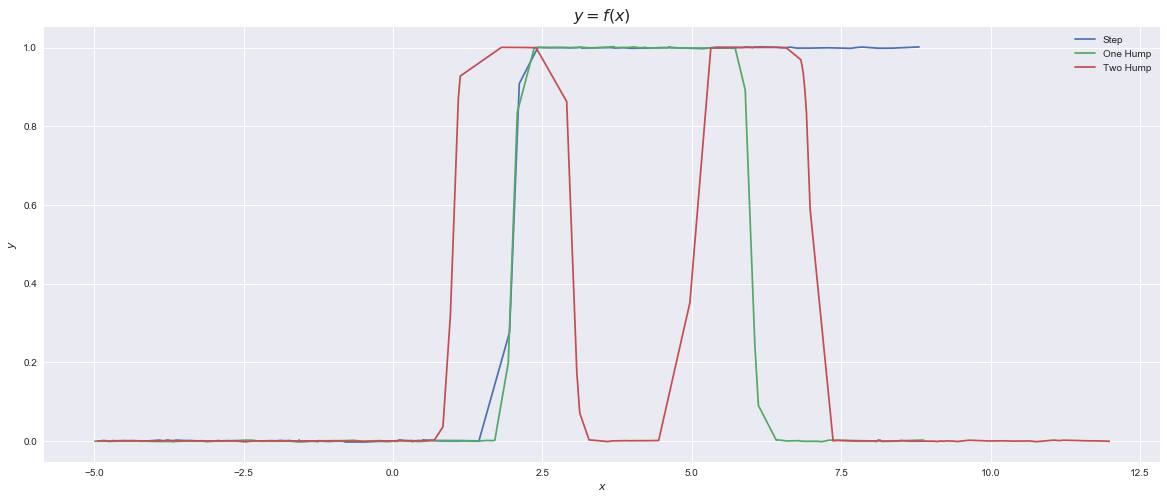

In [23]:
plt.figure(figsize=(20,8))
plt.title("$y=f(x)$", fontsize=16)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.plot(step_df['x'], step_df['y'], label="Step")
plt.plot(one_hump_df['x'], one_hump_df['y'], label="One Hump")
plt.plot(two_hump_df['x'], two_hump_df['y'], label="Two Hump")
plt.legend()

In [52]:
def plot_dfs(df_list,labels,axes2d=None,axes_list=None):
    if axes_list is None:
        axes_list=[]
        for ax in axes2d:
            for a in ax:
                axes_list.append(a)
    for ctr, df in enumerate(df_list, 0):
        axes_list[ctr].set_title(labels[ctr], fontsize=12)
        axes_list[ctr].set_xlabel("$x$")
        axes_list[ctr].set_ylabel("$y$")
        axes_list[ctr].plot(df['x'],df['y'],"o-")

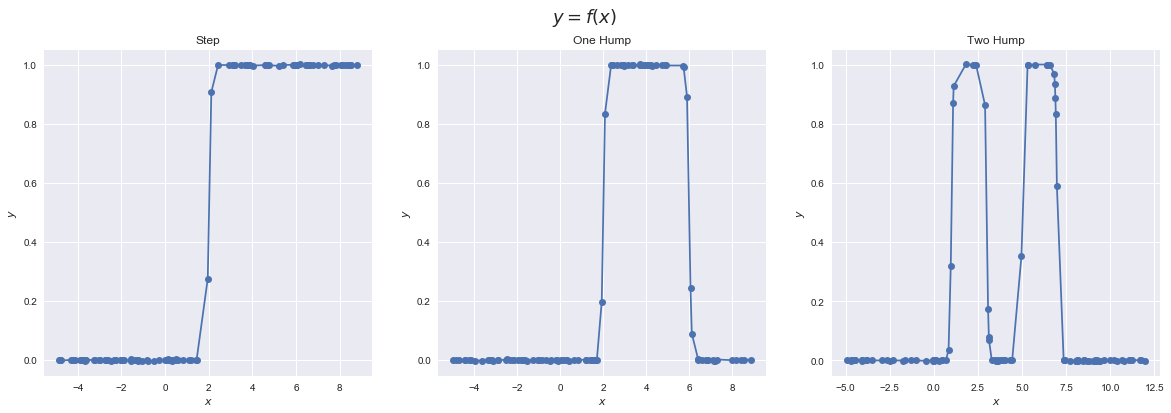

In [53]:
fig, axes = plt.subplots(1,3,figsize=(20,6))
fig.suptitle("$y=f(x)$", fontsize=18)
plot_dfs([step_df,one_hump_df,two_hump_df],["Step","One Hump","Two Hump"],axes_list=axes)

In [447]:
print (step_df.describe())
print (one_hump_df.describe())
print (two_hump_df.describe())

                x           y
count  100.000000  100.000000
mean     1.517285    0.431821
std      4.073068    0.494968
min     -4.861848   -0.002845
25%     -2.009176   -0.000263
50%      0.541288    0.001747
75%      5.247584    0.999669
max      8.805071    1.002055
                x           y
count  100.000000  100.000000
mean     1.711190    0.292614
std      3.761073    0.449767
min     -4.988312   -0.002792
25%     -1.322715   -0.000250
50%      1.627919    0.000896
75%      4.317727    0.998469
max      8.880737    1.002423
                x           y
count  100.000000  100.000000
mean     3.887426    0.179185
std      4.927391    0.363343
min     -4.937933   -0.001925
25%      0.043406   -0.000323
50%      3.844823    0.000344
75%      8.164301    0.002528
max     11.988390    1.000706


**1.2** 

In [55]:
def affine(x, w, b):
    return w*x+b

def sigmoid(x):                                        
    return 1 / (1 + np.exp(-x))

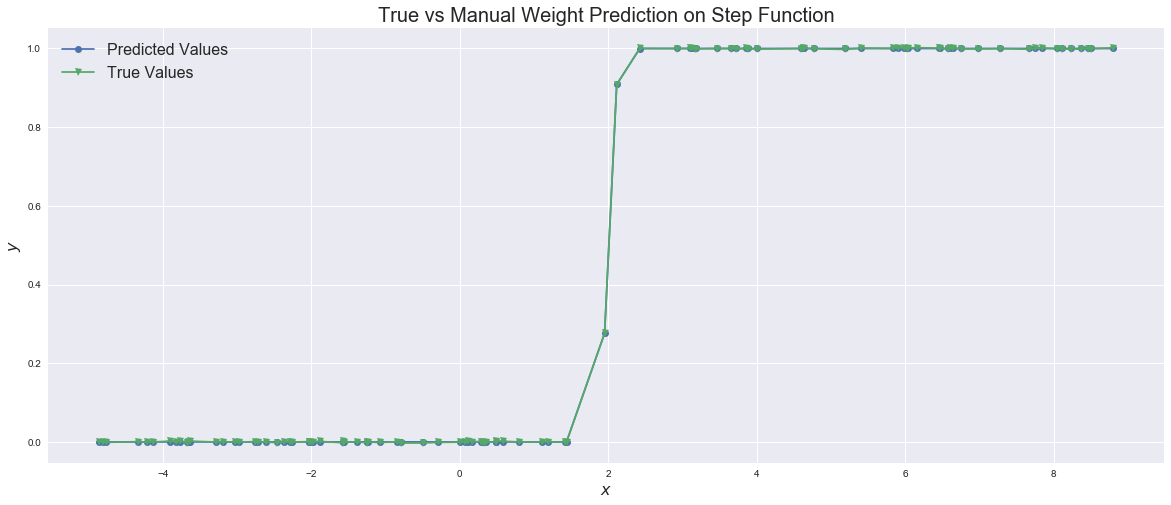

In [509]:
def get_y_pred_step(w1, b):
    return w1*sigmoid(affine(step_df["x"],20,-40)) + b

step_weights_guess = [1,0]
y_pred_step = get_y_pred_step(*step_weights_guess)

plt.figure(figsize=(20,8))
plt.title("True vs Manual Weight Prediction on Step Function", fontsize=20)
plt.plot(step_df['x'],y_pred_step, label="Predicted Values", marker="o")
plt.plot(step_df['x'],step_df['y'], label="True Values", marker="v")
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
plt.legend(fontsize=16)

In [448]:
side_by_side = pd.concat([step_df['y'], y_pred_step],axis=1)
side_by_side = side_by_side.rename (columns={'y': 'real-y', 'x': 'predicted y'})
side_by_side.describe() 

,real-y,predicted y
count,100.000000,1.000000e+02
mean,0.431821,4.318463e-01
std,0.494968,4.949478e-01
min,-0.002845,2.504651e-60
25%,-0.000263,1.522668e-35
50%,0.001747,3.100510e-13
75%,0.999669,1.000000e+00
max,1.002055,1.000000e+00


The predicted y-values for the manually optimized w and b values are close to the real values. However, they cannot exceed the [0,1] range.

**1.3** 

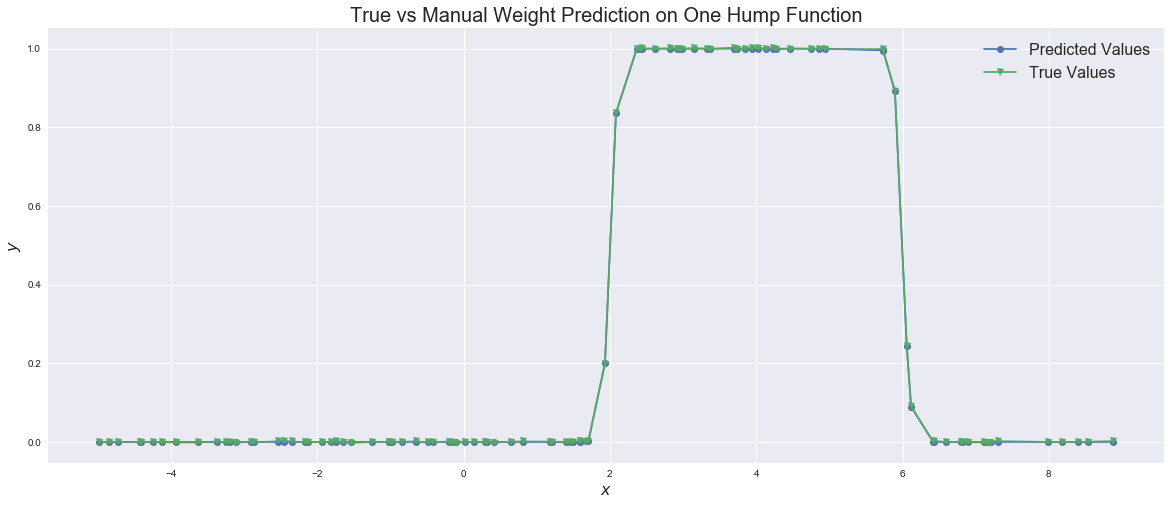

In [504]:
def get_y_pred_one(w1, w2, b):
    return w1*sigmoid(affine(one_hump_df["x"],20,-40))+w2*sigmoid(affine(one_hump_df["x"],-20,120)) + b

one_weights_guess = [1,1,-1]
y_pred_one = get_y_pred_one(*one_weights_guess)

plt.figure(figsize=(20,8))
plt.title("True vs Manual Weight Prediction on One Hump Function", fontsize=20)
plt.plot(one_hump_df['x'],y_pred_one, label="Predicted Values", marker="o")
plt.plot(one_hump_df['x'],one_hump_df['y'], label="True Values", marker="v")
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
plt.legend(fontsize=16)

**1.4**

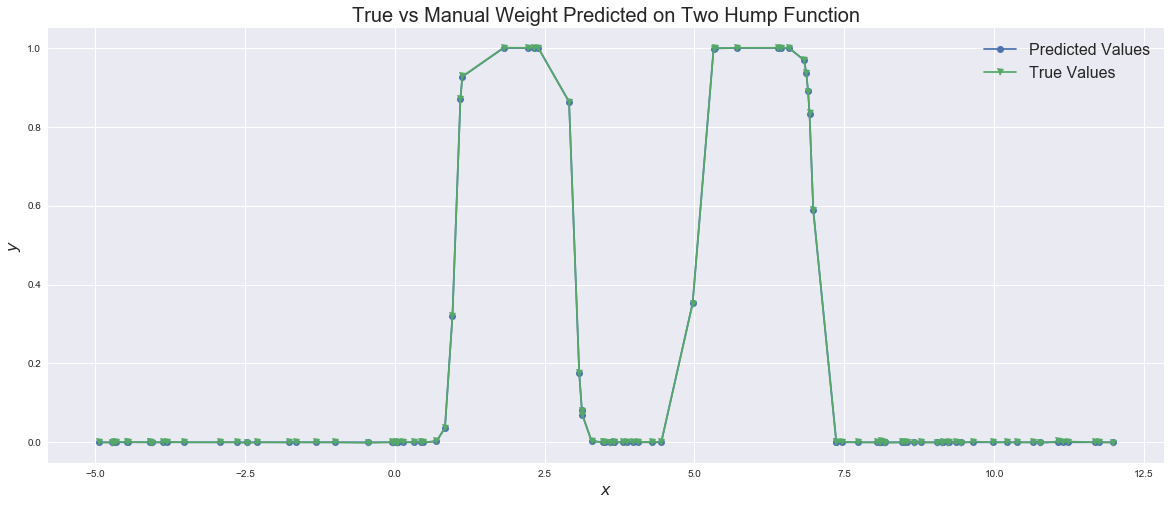

In [503]:
def get_y_pred_two(w1, w2, w3, w4, b):
    return w1*sigmoid(affine(two_hump_df["x"],20,-20)) + \
        w2*sigmoid(affine(two_hump_df["x"],-20,60)) + \
        w3*sigmoid(affine(two_hump_df["x"],20,-100))+ \
        w4*sigmoid(affine(two_hump_df["x"],-20,140))+ b

two_weights_guess = [1,1,1,1,-2]
y_pred_two = get_y_pred_two(*two_weights_guess)

plt.figure(figsize=(20,8))
plt.title("True vs Manual Weight Predicted on Two Hump Function", fontsize=20)
plt.plot(two_hump_df['x'],y_pred_two, label="Predicted Values", marker="o")
plt.plot(two_hump_df['x'],two_hump_df['y'], label="True Values", marker="v")
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
plt.legend(fontsize=16)

**1.5** Choose the appropriate loss function and calculate and report the loss from all three cases. Derive the gradient of the output layer's weights for all three cases (step, one hump and two humps). Use the weights for the hidden layers you found in the previous question and perform gradient descent on the weights of this layer (output layer). What is the optimised weight value and loss you obtained? How many steps did you take to reach this value? What is the threshold value you used to stop?

In [498]:
print("The loss on the step function is %.12f"
      %mean_squared_error(step_df['y'],y_pred_step))
print("The loss on the one hump function is %.12f"
      %mean_squared_error(one_hump_df['y'],y_pred_one))
print("The loss on the two hump function is %.12f"
      %mean_squared_error(two_hump_df['y'],y_pred_two))

The loss on the step function is 0.000001410355
The loss on the one hump function is 0.000001173662
The loss on the two hump function is 0.000000803153


Because this is not strict classification, using mean squared error is appropriate. 

In [158]:
#More code to write.................

# Section 6 Performance of NN/Gradienty decent has sample code to minimize a function
# I understand we only optimize the w for the output function, not the input function
# Lecture 12 slides 23 an onward explain how to get the derivative of the loss function, but that is where I got stuck
# I couldnt find sample code where they minimize the loss function
# also didnt get why they ask for the gradient of the output layer's weights, because aren't we supposed to minimize
# the loss function and dont we need its gradient?

In [479]:
a1 = np.array([1,2,3])
a2 = np.array([2,3,4])
a1+1

array([2, 3, 4])

In [496]:
#So if MSE doesnt improve stop??
#TF recommends running without threshold, plotting change in MSEs, and then deciding a good threshold from that

#not necessarily right, should not have delta or something
def get_new_weights(old_weights, learning, delta, y_function, y_true):
    y_old_pred = y_function(*old_weights)
    mse_old = mean_squared_error(y_true, y_old_pred)
    
    weights_delta = old_weights+delta
    y_delta_pred = y_function(*weights_delta)
    mse_delta = mean_squared_error(y_true, y_delta_pred)
    
    change = learning*((mse_delta - mse_old)/delta)
    
    return old_weights - change #new weights 
    

threshold = 0.0000001 #difference in MSE 
learn = 0.01 #learning rate
delta = 0.1
iters = 0  
max_iters = 1000
    
while iters < max_iter:
    iters+=1

In [497]:
new_w = get_new_weights(np.array(two_weights_guess), learn, delta, get_y_pred_two, two_hump_df['y'])
print("The loss on the two hump function is %.12f"
      %mean_squared_error(two_hump_df['y'],get_y_pred_two(*new_w)))

The loss on the two hump function is 0.000000802657


#Always subtract????
new weights = old weights - learningRate( (MSE(oldweights+delta) - MSE(oldweights))/delta )

<div class="exercise"> <b> Question 2: Working with missing data. [50 pts]</b> </div>

In this exercise we are going to use the **Pima Indians onset of diabetes** dataset found in `pima-indians-diabetes.csv`. This dataset describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years. It is a binary classification problem (onset of diabetes as 1 or not as 0). The input variables that describe each patient are numerical and have varying scales. The list below shows the eight attributes plus the target variable for the dataset:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skin fold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
-  Body mass index.
-  Diabetes pedigree function.
- Age (years).<br>
- **Outcome** (1 for early onset of diabetes within five years, 0 for not), target class.

**2.1**. Load the dataset into a pandas dataframe named `pima_df`. Clean the data by looking at the various features and making sure that their values make sense. Look for missing data including disguised missing data. The problem of disguised missing data arises when missing data values are not explicitly represented as such, but are coded with values that can be misinterpreted as valid data. Comment on your findings.

**2.2** Split the dataset into a 75-25 train-test split (use `random_state=9001`). Fit a logistic regression classifier to the training set and report the  accuracy of the classifier on the test set. You should use $L_2$ regularization in logistic regression, with the regularization parameter tuned using cross-validation (`LogisticRegressionCV`).  Report the overall classification rate.

**2.3** Restart with a fresh copy of the whole dataset and impute the missing data via mean imputation.  Split the data 75-25 (use `random_state=9001`) and fit a regularized logistic regression model.  Report the overall classification rate.  

**2.4** Again restart with a fresh copy of the whole dataset and impute the missing data via a model-based imputation method. Once again split the data 75-25 (same `random_state=9001`) and fit a regularized logistic regression model.  Report the overall classification rate.

**2.5** Compare the results in the 3 previous parts of this problem.  Prepare a paragraph (5-6 sentences) discussing the results, the computational complexity of the methods,  and explain why you get the results that you see.

**2.6** This question does not have one answer and requires some experimentation. Check which coefficients changed the most between the model in 2.1-2.2 and the models in 2.3 and 2.4. Are they the coefficients you expected to change given the imputation you performed? If not explain why (supporting your explanation using the data is always a good idea).


### Answers

**2.1** 

In [455]:
pima_df = pd.read_csv("data/pima-indians-diabetes.csv")
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [456]:
#examine potential missing values
#pima_df[pima_df["Glucose"]==0].head()
#pima_df[pima_df["BloodPressure"]==0].head()
#pima_df[pima_df["SkinThickness"]==0].head()
#pima_df[pima_df["Insulin"]==0].head()
#pima_df[pima_df["BMI"]==0].head()
#pima_df[pima_df["DiabetesPedigreeFunction"]==0].head()
#pima_df[pima_df["Age"]==0].head()

After examining the dataset we see that 0 is used to mark a missing value. However, because someone can have 0 pregnancies, we recognize that this does not mark a missing value for that feature. For every other feature, a value of 0 is not meaningful and therefore marks a missing value. We see that Glucose, BloodPressure, SkinThickness, Insulin, and BMI have some 0s so we will mark them with NaN on cleaning. DiabetesPedigreeFunction and Age are properly inputted on examination, so we dont have to clean them. The response variable will need some cleaning as well as some values contain erroneous trailing characters and is also not properly casted as an integer.

In [457]:
def clean_df(df, labels, nan_list, y=None):
    #df - dataframe to clean
    #labels - columns with "missing" data
    #nan - list of values that represent missing data
    #y - response variable to be cleaned
    for l in labels:
        for nan in nan_list:
            df.loc[df[l] == nan,[l]] = np.nan
    if y is not None:
        df[y] = df[y].astype(str).str[0] #strip to first character
        df[y] = df[y].astype(int) #cast as int
    return df

In [458]:
pima_nan_df = pima_df.copy()
clean_df(pima_nan_df,["Glucose","BloodPressure","SkinThickness","Insulin","BMI"], [0], "Outcome")
pima_nan_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


For 2.2's `LogisticRegressionCV`, we need a dataset that has samples with NaN dropped. This is fine for now as later we will impute these values and run another regression.

In [459]:
pima_drop_df = pima_nan_df.dropna(axis=0, how="any")
pima_drop_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


**2.2** 

In [460]:
#from previous homework
def normalize_columns(labels, df, scaler=None):
    if scaler is None:
        scaler = MinMaxScaler().fit(df.loc[:,labels])
        df.loc[:,labels] = scaler.transform(df.loc[:,labels].copy())
    else:
        df.loc[:,labels] = scaler.transform(df.loc[:,labels].copy())
    return df

def normalize_dfs(labels, df_train, df_test=None):
    scaler = MinMaxScaler().fit(df_train.loc[:,labels]) #fit scaler to training data
    df_train = normalize_columns(labels, df_train, scaler) #transform training data
    if df_test is None:    
        return df_train
    else:
        df_test = normalize_columns(labels,df_test,scaler) #transform test data by training scaler
        return df_train, df_test

Discuss why we normalize...

In [461]:
df_train, df_test = train_test_split(pima_drop_df, random_state=9001, test_size=0.25) #split on dropped NaN data
targets=["Outcome"]
x_cols = pima_df.columns.difference(targets)
df_train, df_test = normalize_dfs(x_cols, df_train, df_test) #normalize data

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [463]:
x_train, x_test = df_train[x_cols], df_test[x_cols]
y_train, y_test = df_train[targets], df_test[targets]

In [464]:
#Takes a while to run...
model_LR = LogisticRegressionCV(Cs=100000, cv=5, max_iter = 250).fit(x_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [465]:
y_train_pred = model_LR.predict(x_train)
y_test_pred = model_LR.predict(x_test)

In [511]:
print("The classification accuracy for the logistic regression on the training set is %.4f"
      %accuracy_score(y_train,y_train_pred))
print("The classification accuracy for the logistic regression on the test set is %.4f"
      %accuracy_score(y_test,y_test_pred))

The classification accuracy for the logistic regression on the training set is 0.8157
The classification accuracy for the logistic regression on the test set is 0.6939


In [510]:
cm2 = confusion_matrix(y_test, y_test_pred)

print ("Breakdowns of predictions for test set:\n")
print ("True positives:  {:3d} False Negatives: {:3d}".format(cm2[0,0], cm2[0,1]) )
print ("False positives: {:3d} True Negatives:  {:3d}".format(cm2[1,0], cm2[1,1]))

Breakdowns of predictions for test set:

True positives:   51 False Negatives:   6
False positives:  24 True Negatives:   17


The 31% incorrect categorizations in the test set consists of 24 false positives and 6 false negatives. In medical diagnostics, the false negatives are worse than the false postives, because it can lead to missing a fatal illness. The number of false positives is low at 6% of the test set and much lower than the false positives.

**2.3** Restart with a fresh copy of the whole dataset and impute the missing data via mean imputation.  Split the data 75-25 (use `random_state=9001`) and fit a regularized logistic regression model.  Report the overall classification rate.  

In [441]:
df_train, df_test = train_test_split(pima_nan_df, random_state=9001, test_size=0.25) #split on data with NaN
imp_mean = Imputer(copy=True, missing_values=np.nan, strategy='mean').fit(df_train) #fit to training data

df_train_mean = pd.DataFrame(imp_mean.transform(df_train), columns=df_train.columns, index=df_train.index)
df_test_mean = pd.DataFrame(imp_mean.transform(df_test), columns=df_test.columns, index=df_test.index)

df_train_mean, df_test_mean = normalize_dfs(x_cols, df_train_mean, df_test_mean) #normalize data

x_train_mean, x_test_mean = df_train_mean[x_cols], df_test_mean[x_cols]
y_train_mean, y_test_mean = df_train_mean[targets], df_test_mean[targets]

In [442]:
#Takes a while to run...
model_imp_mean = LogisticRegressionCV(Cs=100000, cv=5, max_iter = 250).fit(x_train_mean, y_train_mean)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [443]:
y_train_mean_pred = model_imp_mean.predict(x_train_mean)
y_test_mean_pred = model_imp_mean.predict(x_test_mean)

In [512]:
print("The classification accuracy for the logistic regression on the mean imputed training set is %.4f"
      %accuracy_score(y_train_mean,y_train_mean_pred))
print("The classification accuracy for the logistic regression on the mean imputed test set is %.4f"
      %accuracy_score(y_test_mean,y_test_mean_pred))

The classification accuracy for the logistic regression on the mean imputed training set is 0.7679
The classification accuracy for the logistic regression on the mean imputed test set is 0.7592


In [513]:
cm3 = confusion_matrix(y_test_mean, y_test_mean_pred)

print ("Breakdowns of predictions for test set:\n")
print ("True positives:  {:3d} False Negatives: {:3d}".format(cm3[0,0], cm3[0,1]) )
print ("False positives: {:3d} True Negatives:  {:3d}".format(cm3[1,0], cm3[1,1]))

Breakdowns of predictions for test set:

True positives:  106 False Negatives:  27
False positives:  19 True Negatives:   39


The 24% incorrect categorizations in the test set consists of 19 false positives and 27 false negatives using the ean imputation approach. The number of false positives in this case is higher than the false postives. The percentage of false postives in the test set is 14% and much higher than in 2.2 where we dropped rows with NaN values.

**2.4** 

In [529]:
# Imputation approach: replace missing values based on a linear regression using other features in the dataset
# many rows have several NaN values which makes it impossible to use rows with NaN values as predictors
# therefore only the 'clean' columns (no NaN values) are used for regression fit and prediction

# Steps:
# for the regression fit we use a model copy where all rows with any NaN value are dropped
# for each column with Nan values:
#    make a regression function with that column as y and all clean columns as X (except response variable)
#    for all missing values predict the value using the regression model.predict()
#    replace all NaNs in original dataframe with those values

# initial clean-up of a copy of the data as before
pima_model_df = pima_df.copy()
clean_df(pima_model_df,["Glucose","BloodPressure","SkinThickness","Insulin","BMI"], [0], "Outcome")

# make copy with all rows with NaN dropped to be used for regression fit
pima_model_drop_df = pima_drop_df.copy()

# define columns with NaN values and clean columns
columns_with_NaN = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
clean_columns = ['Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


print ("Showing missing values with their imputed values based on linear regression…\n")
for c in columns_with_NaN:
    # for all columns with NaN values
    
    # train regression on model with clean columns as X and column c as y
    X_train = pima_model_drop_df[clean_columns]
    # print (X_train.head())

    y_train = pima_model_drop_df[c]
    # print (y_train.head())

    #create linear regression model
    regr = LinearRegression()
    regr.fit(X_train, y_train)

    # use this regression model to substitute missing values using regression model based imputation
    
    # find indexes with NaN value in column c
    indexes_to_replace = pima_model_df.loc[pima_model_df[c].isnull(), c].index.tolist()
    print ("NaN Values for response variable", c, ":")
    print (pima_model_df.loc[indexes_to_replace,c][:10]) # show first 10 rows of NaN values
    if len(indexes_to_replace) >=10:
        print ("…")
    
    # replace NaN values in column c for those indices with imputed value using regression
    print("\nReplaced by imputed values using linear regression model:")
    imputed_values = pd.DataFrame(np.array(regr.predict(pima_model_df.loc[indexes_to_replace, clean_columns]) ),
                                 index=indexes_to_replace, columns=[c])
    pima_model_df.loc[indexes_to_replace, c] = imputed_values
    display_cols = [c] + clean_columns
    print(pima_model_df.loc[indexes_to_replace, display_cols][:10])
    if len(indexes_to_replace) >=10:
        print ("…")
    print("\n")

# Split the new data set and fit a regularized logistic regression
df_train, df_test = train_test_split(pima_model_df, random_state=9001, test_size=0.25) #split on data with NaN
x_train, x_test = df_train[x_cols], df_test[x_cols]
y_train, y_test = df_train[targets], df_test[targets]
model_replaced_LR = LogisticRegressionCV(Cs=100000, cv=5, max_iter = 250).fit(x_train, y_train)

Showing missing values with their imputed values based on linear regression…

NaN Values for response variable Glucose :
75    NaN
182   NaN
342   NaN
349   NaN
502   NaN
Name: Glucose, dtype: float64

Replaced by imputed values using linear regression model:
        Glucose  Pregnancies  DiabetesPedigreeFunction  Age  Outcome
75   107.304577            1                     0.140   22        0
182  106.976328            1                     0.299   21        0
342  107.918806            1                     0.389   22        0
349  144.864564            5                     0.346   37        1
502  147.927244            6                     0.727   41        1


NaN Values for response variable BloodPressure :
7     NaN
15    NaN
49    NaN
60    NaN
78    NaN
81    NaN
172   NaN
193   NaN
222   NaN
261   NaN
Name: BloodPressure, dtype: float64
…

Replaced by imputed values using linear regression model:
     BloodPressure  Pregnancies  DiabetesPedigreeFunction  Age  Outcome
7     

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [530]:
# Testing Accuracy
y_train_pred = model_replaced_LR.predict(x_train)
y_test_pred = model_replaced_LR.predict(x_test)

print("The classification accuracy for the logistic regression on the training set is %.4f"
      %accuracy_score(y_train,y_train_pred))
print("The classification accuracy for the logistic regression on the test set is %.4f"
      %accuracy_score(y_test,y_test_pred))

The classification accuracy for the logistic regression on the training set is 0.7871
The classification accuracy for the logistic regression on the test set is 0.7853


In [531]:
cm4 = confusion_matrix(y_test, y_test_pred)

print ("Breakdowns of predictions for test set:\n")
print ("True positives:  {:3d} False Negatives: {:3d}".format(cm4[0,0], cm4[0,1]) )
print ("False positives: {:3d} True Negatives:  {:3d}".format(cm4[1,0], cm4[1,1]))

Breakdowns of predictions for test set:

True positives:  110 False Negatives:  23
False positives:  18 True Negatives:   40


**2.5** 

The accuracy of the mean imputation and the linear regression imputation models for the test set are the same. The small exception being that linear regression imputation had one less false negative, a minor improvement over the mean imputation. Using the value regressed from three other predictors did not improve the result much over just using the mean, so the extra computational complexity associated with the LR does not seem worth it. The LT approach would only work if there was correlation between teh predictors.

However there is a significant 7% improvement in accuracy on the test set when using mean imputation (76%) instead of dropping rows with missing values (69%). The improvement is likely due to the fact that the training set is much bigger, because no rows are dropped. The relatively small additonal computational complexity to calculate the mean seems worth it. However there is one caveat. The models with imputation both have significantly more false negatives, which in the context of a medical test is a big drawback, even though the number of false positives is so much lower. The medical consequences of false negatives are just more serious.

**2.6** 

In [ ]:
# Compare coefficients

print ("Coefficients                  DROP       MEAN       LR")
for i, x_col in enumerate(x_cols):
    print ("{:24} {:+10.2f}".format(x_col,model_LR.coef_[0, i]), \
          "{:+10.2f}".format(model_imp_mean.coef_[0, i]), \
          "{:+10.2f}".format(model_replaced_LR.coef_[0, i]) ) 

The coefficient values for the mean imputation and the linear regression imputation are very similar. The coefficients for the model where rows with missing values where dropped have significantly different values, especially for Age and Glucose. These coefficients are near zero in the models with mean and LR imputed values. It is unexpected that the Age coefficient changed so much, because no imputation was done on this predictor. The change in coefficient is likely due to the larger training set.